<a href="https://colab.research.google.com/github/Kalpesh-Rajput/DeepLearning/blob/main/Object_Recognition_in_Images(DeepLearning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train[1].shape

(32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
def plot_sample(index):
  plt.figure(figsize = (10,1))
  plt.imshow(X_train[index])

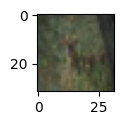

In [ ]:
plot_sample(10)

In [ ]:
y_train[10]

array([4], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[y_train[10][0]]

'deer'

In [ ]:
y_train[5]

array([1], dtype=uint8)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
32*32

1024

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, num_classes=10)


y_test_categorical = to_categorical(y_test, num_classes=10)

In [ ]:
y_train_categorical[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs = 1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 162s 102ms/step - accuracy: 0.3059 - loss: 1.9327


In [ ]:
np.argmax(model.predict(X_test_scaled)[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


3

In [ ]:
y_test[0]


array([3], dtype=uint8)

In [ ]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.3038 - loss: 1.9275
2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<h3 style='color:purple'>Lets run same test for 10 epocs<h3>

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.3035 - loss: 1.9386
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 92ms/step - accuracy: 0.4215 - loss: 1.6397
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 92ms/step - accuracy: 0.4491 - loss: 1.5587
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 209s 96ms/step - accuracy: 0.4748 - loss: 1.4928
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 93ms/step - accuracy: 0.4906 - loss: 1.4498
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 93ms/step - accuracy: 0.5074 - loss: 1.3953
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 206s 96ms/step - accuracy: 0.5251 - loss: 1.3556
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 92ms/step - accuracy: 0.5404 - loss: 1.3144
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 93ms/step - accuracy: 0.5488 - loss: 1.2867
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 94ms/step - accuracy: 0.5611 - loss: 1.2451
31min 48s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
